<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/DGI-Lab/blob/master/day1/Decision_Trees_DGI.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Decision Trees

In [1]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn import pipeline

## Download the Data

In [2]:
data_path = os.path.join("datasets", "")

In [3]:
import urllib.request

download_path = "https://raw.githubusercontent.com/AbdelMahm/DGI-Lab/master/"
os.makedirs(data_path, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv", "REPARTITION_CAPITAL_VF.xlsx"):
    print("Downloading", filename)
    url = download_path + "day1/datasets/" + filename
    urllib.request.urlretrieve(url, data_path + filename)

## Load the Dataframe

In [4]:
liste_vf = pd.read_excel(data_path + 'REPARTITION_CAPITAL_VF.xlsx', sheet_name='Liste_VF', index_col=0)
base_vf = pd.read_excel(data_path + 'REPARTITION_CAPITAL_VF.xlsx', sheet_name='Base_VF', index_col=0)

In [5]:
liste_vf.head()

,Type Contribuable
RS,
AAAF,PP
AAAV,PP
AAEE,PP
AAEG,PP
AAFN,PP


In [6]:
base_vf.head()

,Raison Sociale,Associé 1,Associé 2,Associé 3
ID,,,,
1,DQVG,DWUE,IQFV,UPTY
2,QTZP,AKRC,NTLR,PQPC
3,SYQB,ABLI,NTXL,WYUX
4,PQQL,BARI,KYEU,VRSO
5,ZPJC,GGIF,LFTD,WGGU


## Some Operations on DataFrame

In [7]:
base_vf.shape

(9998, 4)

In [8]:
base_vf.columns

Index(['Raison Sociale', 'Associé 1', 'Associé 2', 'Associé 3'], dtype='object')

In [9]:
type(base_vf["Associé 1"])

pandas.core.series.Series

In [10]:
base_vf.describe()

,Raison Sociale,Associé 1,Associé 2,Associé 3
count,9998,9998,9998,9998
unique,9998,4308,4272,5524
top,KRCD,AVMM,JPXN,WOIQ
freq,1,10,9,7


In [11]:
base_vf[["Associé 1", "Associé 2", "Associé 3"]]

,Associé 1,Associé 2,Associé 3
ID,,,
1,DWUE,IQFV,UPTY
2,AKRC,NTLR,PQPC
3,ABLI,NTXL,WYUX
4,BARI,KYEU,VRSO
5,GGIF,LFTD,WGGU
...,...,...,...
9994,DOZQ,KEXG,OWZN
9995,BKMV,MYVE,ZRCT
9996,BRHW,MJBS,YZLH


In [12]:
base_vf["Associé 1"]

ID
1       DWUE
2       AKRC
3       ABLI
4       BARI
5       GGIF
        ... 
9994    DOZQ
9995    BKMV
9996    BRHW
9997    FMEM
9998    DBCG
Name: Associé 1, Length: 9998, dtype: object

In [13]:
base_vf[base_vf['Associé 1'] == 'DKTC']

,Raison Sociale,Associé 1,Associé 2,Associé 3
ID,,,,
1364,RMKG,DKTC,LNJB,RWLN
1628,AWIM,DKTC,HPYO,QYNR
2715,IBBL,DKTC,JHZK,PYFM
3421,GSCY,DKTC,LHKU,YZYX
3624,ILHH,DKTC,MCQU,ROMX
4353,OAPY,DKTC,OHQI,XULM
5221,HLUV,DKTC,NZCF,VLCF
5821,VAKD,DKTC,LZBC,YZDV
5909,ZAHK,DKTC,IRQQ,PSJN


In [14]:
base_vf[base_vf['Associé 1'] == 'DKTC'].describe()

,Raison Sociale,Associé 1,Associé 2,Associé 3
count,10,10,10,10
unique,10,1,10,10
top,BPUX,DKTC,OHQI,PSJN
freq,1,10,1,1


In [15]:
base_vf[['Raison Sociale','Associé 1']][base_vf['Associé 1'] == 'DWUE']

,Raison Sociale,Associé 1
ID,,
1,DQVG,DWUE
1143,QWMX,DWUE
9038,MOYC,DWUE


In [16]:
base_vf.set_index('Raison Sociale', inplace=True)

In [17]:
base_vf.loc['DQVG']

Associé 1    DWUE
Associé 2    IQFV
Associé 3    UPTY
Name: DQVG, dtype: object

In [18]:
#base_vf.reset_index(inplace=True)

In [19]:
#df.sort_values(by=['Raison Sociale'])

In [20]:
base_vf.head()

,Associé 1,Associé 2,Associé 3
Raison Sociale,,,
DQVG,DWUE,IQFV,UPTY
QTZP,AKRC,NTLR,PQPC
SYQB,ABLI,NTXL,WYUX
PQQL,BARI,KYEU,VRSO
ZPJC,GGIF,LFTD,WGGU


In [21]:
#liste_vf.set_index('RS', inplace=True)

In [22]:
liste_vf.head()

,Type Contribuable
RS,
AAAF,PP
AAAV,PP
AAEE,PP
AAEG,PP
AAFN,PP


## Concatenate the two dataframes

In [23]:
all_data = pd.concat([liste_vf, base_vf], axis=1, sort=False)
all_data.head()

,Type Contribuable,Associé 1,Associé 2,Associé 3
AAAF,PP,NaN,NaN,NaN
AAAV,PP,NaN,NaN,NaN
AAEE,PP,NaN,NaN,NaN
AAEG,PP,NaN,NaN,NaN
AAFN,PP,NaN,NaN,NaN


In [24]:
all_data.dropna(inplace=True)
all_data.head()

,Type Contribuable,Associé 1,Associé 2,Associé 3
ADJL,PP,GJWF,HQIE,SBVZ
ALAW,PP,FFQF,IOQA,VPLX
AOUO,PP,CDUZ,IVEH,XYFR
APCO,PP,BJYT,KKPE,TBRK
ASQX,PP,EJNT,JXDP,ULML


## Train a simple Decision Tree

In [25]:
from sklearn.model_selection import train_test_split

all_data_encoded = pd.get_dummies(all_data, columns=["Associé 1", "Associé 2", "Associé 3"])

train, test = train_test_split(all_data_encoded, test_size=0.2)

In [26]:
all_data_encoded.head()

,Type Contribuable,Associé 1_AAAC,Associé 1_AAAD,Associé 1_AADA,Associé 1_AAEG,Associé 1_AAIL,Associé 1_AASM,Associé 1_AAVK,Associé 1_AAXG,Associé 1_AAXM,...,Associé 3_ZZEO,Associé 3_ZZFH,Associé 3_ZZJY,Associé 3_ZZKT,Associé 3_ZZLV,Associé 3_ZZMF,Associé 3_ZZMK,Associé 3_ZZVR,Associé 3_ZZWN,Associé 3_ZZXH
ADJL,PP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALAW,PP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AOUO,PP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APCO,PP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASQX,PP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y_train = train['Type Contribuable']
X_train = train.loc[:, train.columns != 'Type Contribuable']

y_test = test['Type Contribuable']
X_test = test.loc[:, test.columns != 'Type Contribuable']

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

### Visualization

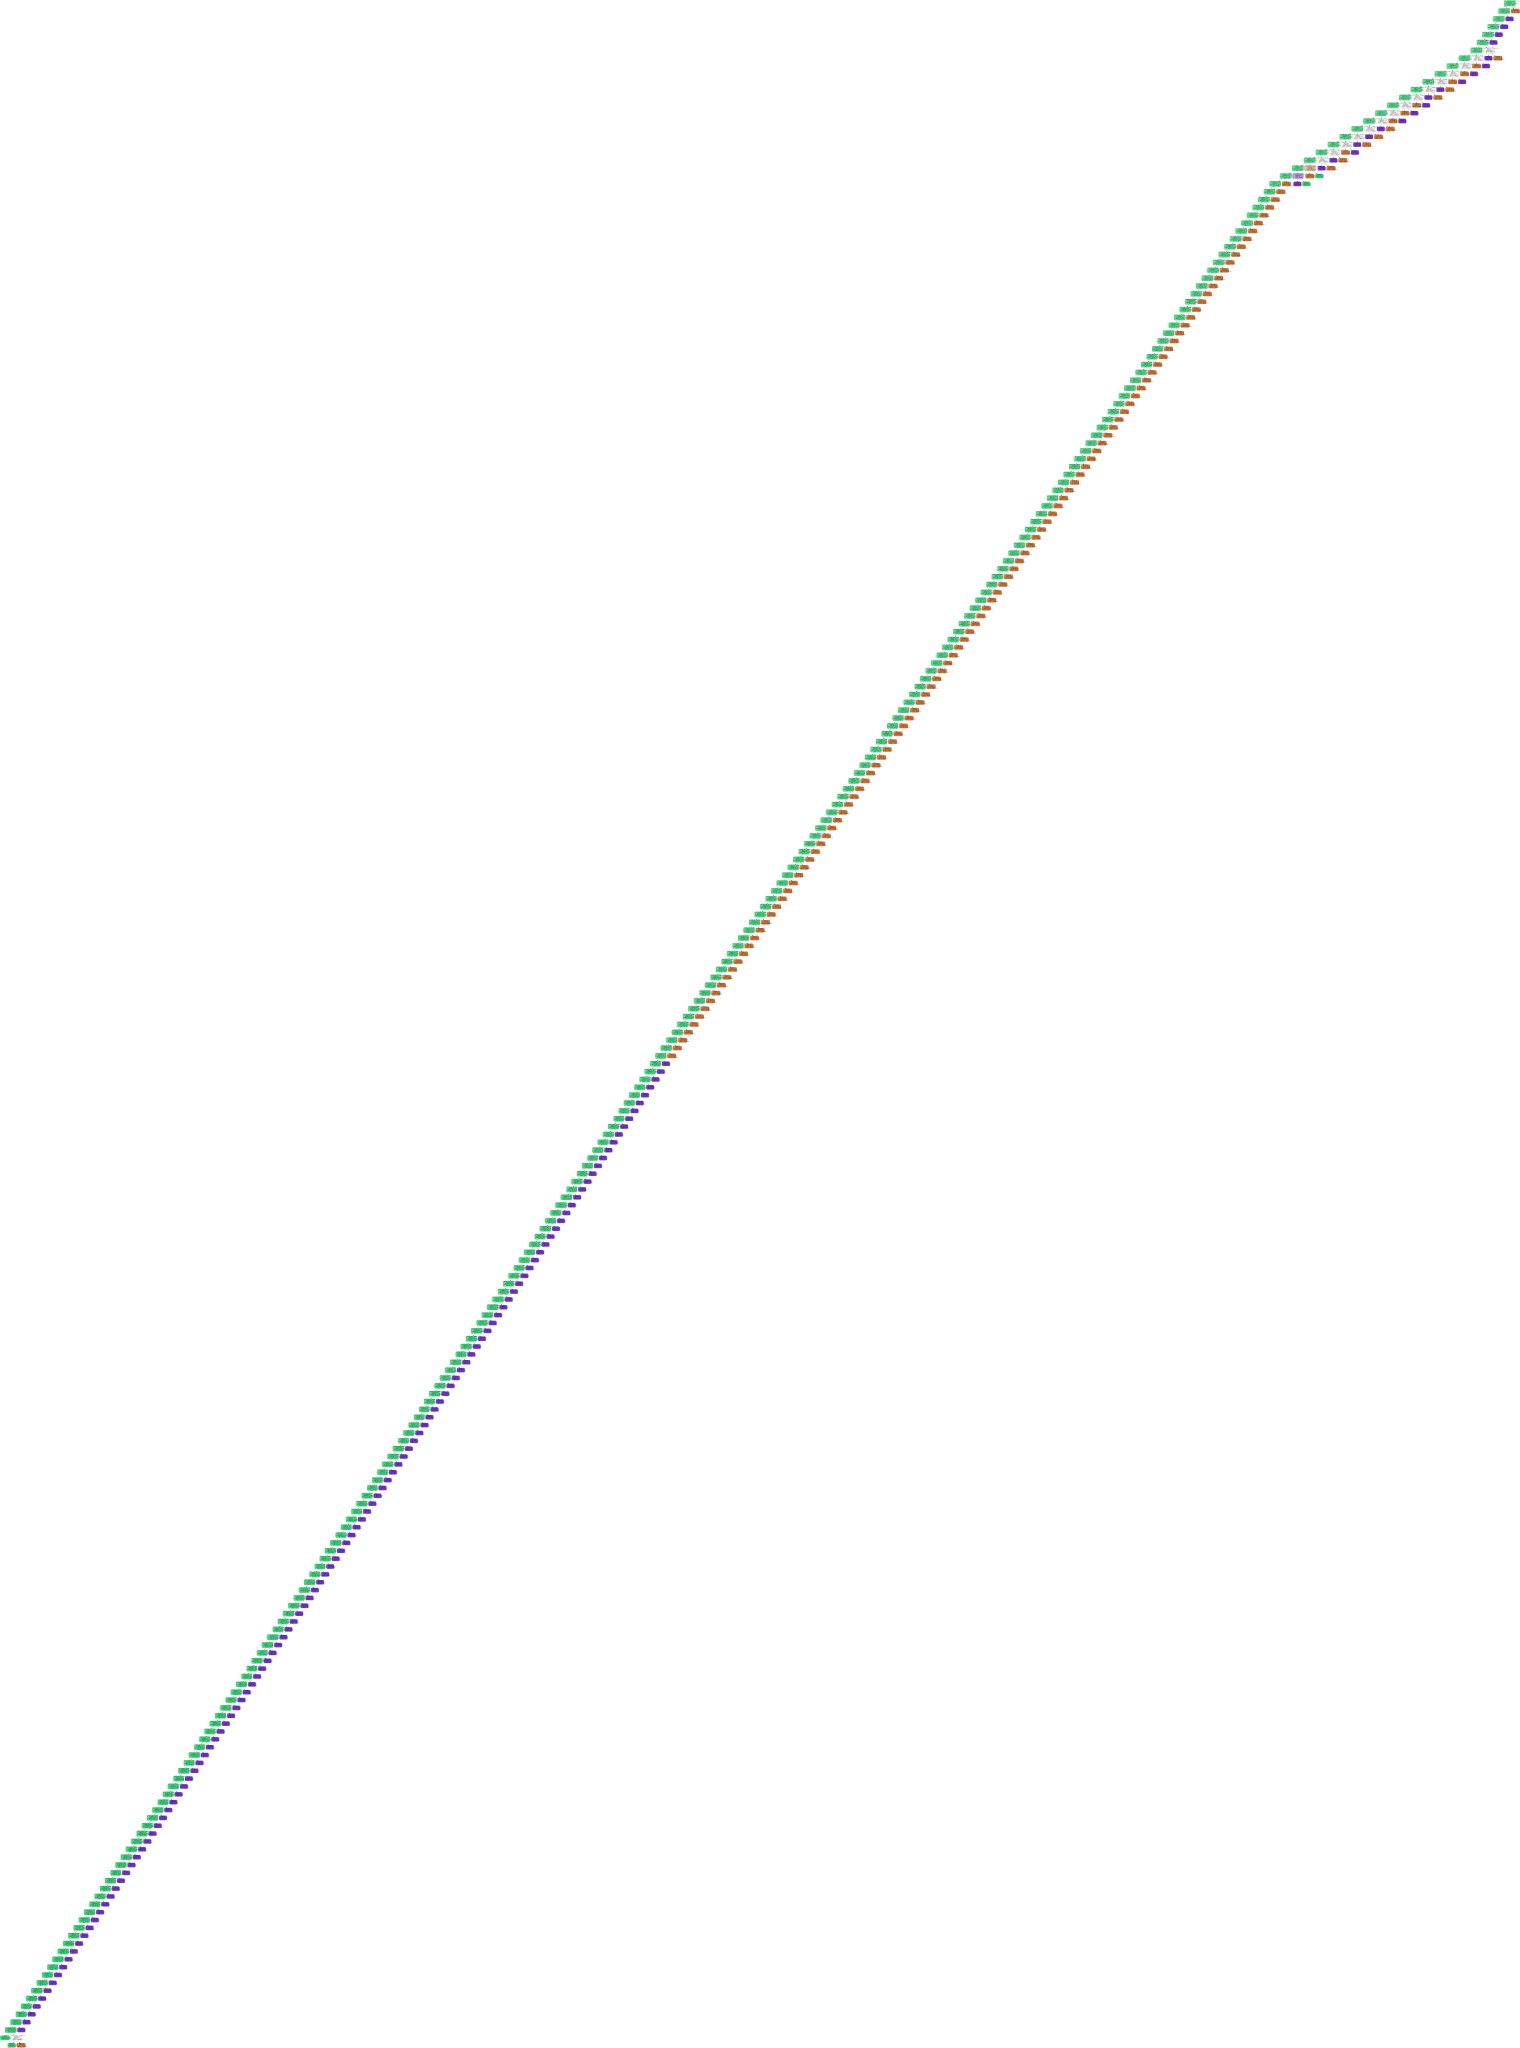

In [30]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(clf, out_file=None, 
                     feature_names= list(set(X_train)),  
                     class_names=list(set(y_train)),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#graph.render("graph") # ==> graph.pdf

### Performance

In [31]:
y_hat = clf.predict(X_test)

sum((y_hat == y_test))/len(y_test)

0.8149779735682819

## Simple example with Iris Dataset

In [32]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

iris = load_iris()

X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

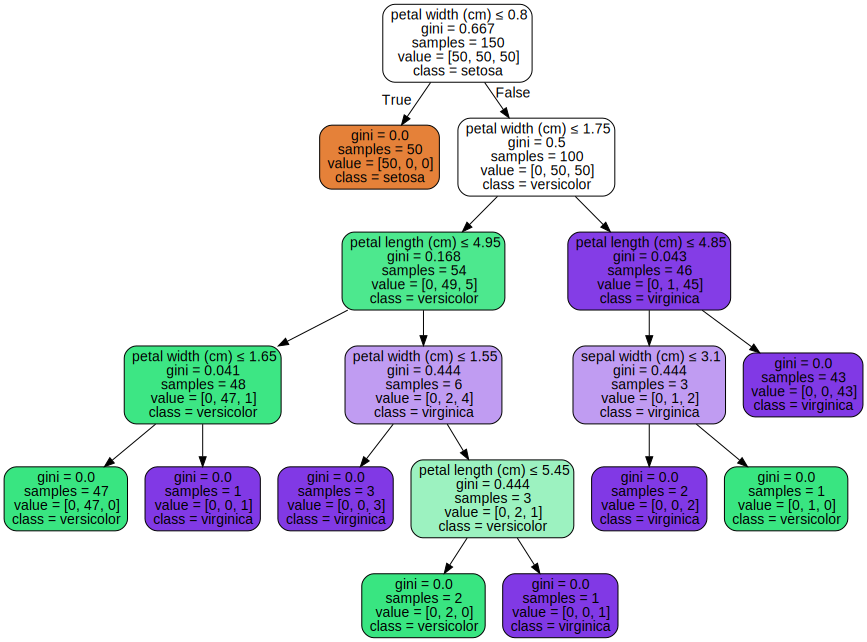

In [33]:


dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#graph.render("iris")